In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [19]:
# K-means algorithm (Unsupervised clustering algorithm) --> # of clusters (k) is a parameter
# Intialize:  
#             - (k) cluster centroids to random positions 
#             - Normalize feature space
# Iteratively:
#             [E] Expectation:
#             - re-Assign segments (x) to centroid class {based on distance of features to centroid}
#             [M] Maximization:
#             - re-position centroid position to fit segments in the cluster
 
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # Expectation
        idx = find_closest_centroids(X, centroids) # Find closest centroid
        # Maximization
        centroids = compute_centroids(X, idx, k)   # Update centroids
    
    return idx, centroids

def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    # re-assign segments based on cluster position
    for i in range(m):
        min_dist = 1000000  # tolerance
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2) #euclidean distance between features
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    # Find new centroid position based on new classifications
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

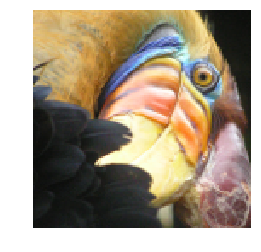

Original Image dimensions:  (128, 128, 3) 
Flattened Image Dimensions: (16384, 3)

In this scenario, we are going to define a image segment (x) as a pixel -> 128x128 : 16384
The feature space will span across the RGB dimensions -> 3


In [24]:
# K-means for image compression

# Display image contents
image_data = loadmat('data/bird_small.mat')
A = image_data['A']
plt.imshow(A)
plt.axis('off')
plt.show()



# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print("Original Image dimensions: ",A.shape,"\nFlattened Image Dimensions:", X.shape)
print("\nIn this scenario, we are going to define a image segment (x) as a pixel -> 128x128 : 16384")
print("The feature space will span across the RGB dimensions -> 3")

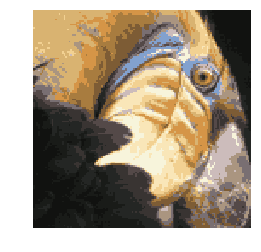

In [25]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)
plt.axis('off')
plt.show()


In [32]:
# The k-means clustering will return new centroid coordinates (w --> 16x3)
# that can be used to project the reduced segments to a recovered image: based on segment classification
#                                 ( 128x128x1)   --> (128x128x3)
# to re-project:  transform reduced segments to their associated centroid dimensions 
#                 (w.T|c*x|c : 3x1 * 1xc --> 3xc)